# Final Notebook 002 - Data Analysis (Mutual Information and Company-wide Clustering)

## Import

In [1]:
import sentisignal
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import pylab as P 
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import scipy.stats as s
import statsmodels.api as sm
import pprint
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from datetime import datetime
from yahoo_finance import Share
from pandas_datareader import data, wb
from statsmodels.graphics.api import qqplot
from operator import itemgetter
from decimal import *
from sklearn.neighbors.kde import KernelDensity

# plt.style.use('ggplot')
# sns.set_style("darkgrid")
# sns.set_context("notebook")

## Configuration

In [3]:
data_primary_path = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology_path = '../../data/csv/symbology.csv'
data_pickles_path = '../../data/pickles/'
data_nasdaq_company_list_path = '../../data/nasdaq/companylist.csv'
start_date = '2012-01-01'
end_date = '2016-01-01'

## Reload Data

In [4]:
data_symbology = pd.read_csv(data_symbology_path)

### Use NASDAQ data to get top 100 companies by MarketCap

In [5]:
data_nasdaq_company_list = pd.read_csv(data_nasdaq_company_list_path)
data_nasdaq_top_100_mkt_cap = data_nasdaq_company_list.head(100)
data_nasdaq_top_100_mkt_cap_symbols = data_nasdaq_top_100_mkt_cap['Symbol'].unique()

### Load results from intermediate pickle

In [6]:
data_nasdaq_top_100_preprocessed_merge = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_100_preprocessed_merge_'+start_date+'_'+end_date)

### Load window results from intermediate pickle

In [7]:
data_nasdaq_top_100_preprocessed_merge_window_30 = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_100_preprocessed_merge_'+start_date+'_'+end_date+'_window_30')

## Data Analytics (No window)

## Count time series

### MI (Mutual Information)

In [8]:
data_nasdaq_top_100_preprocessed_merge.groupby(['SYMBOL']).apply(len)

SYMBOL
AAL       928
AAPL     1006
ADBE     1006
ADI       922
ADP       994
ADSK      995
ALXN      998
AMAT     1000
AMGN     1006
AMTD      914
AMZN     1006
ATVI     1005
BIDU     1006
BIIB     1002
BMRN      965
CA       1000
CELG     1006
CERN      980
CHKP      960
CHTR      910
CMCSA    1006
CME      1006
COST     1008
CSCO     1006
CSX       993
CTRP      994
CTSH      975
DISH      999
DLTR      999
EA       1006
         ... 
MYL       771
NFLX     1005
NTRS      869
NVDA     1006
NXPI      969
ORLY      988
PAYX      982
PCAR      957
PCLN     1006
PYPL      126
QCOM     1005
QQQ      1005
QVCA      161
REGN     1001
ROST      997
SBAC      879
SBUX     1006
SIRI      535
SNDK     1006
SWKS      992
TMUS      674
TROW      927
TSLA     1006
TXN      1005
VIA       937
VOD      1008
VRSK      867
VRTX     1004
WBA       253
YHOO     1006
dtype: int64

In [13]:
# def shift
data_nasdaq_top_100_preprocessed_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, True)

['AAL'] exante  True
doane 926
success
doane 925
success
doane 924
success
doane 923
success
doane 922
success
doane 921
success
doane 920
success
doane 919
success
doane 918
success
doane 917
success
doane 916
success
['AAL'] exante  True
doane 926
success
doane 925
success
doane 924
success
doane 923
success
doane 922
success
doane 921
success
doane 920
success
doane 919
success
doane 918
success
doane 917
success
doane 916
success
['AAPL'] exante  True
doane 1004
success
doane 1003
success
doane 1002
success
doane 1001
success
doane 1000
success
doane 999
success
doane 998
success
doane 997
success
doane 996
success
doane 995
success
doane 994
success
['ADBE'] exante  True
doane 1004
success
doane 1003
success
doane 1002
success
doane 1001
success
doane 1000
success
doane 999
success
doane 998
success
doane 997
success
doane 996
success
doane 995
success
doane 994
success
['ADI'] exante  True
doane 920
success
doane 919
success
doane 918
success
doane 917
success
doane 916
success
d

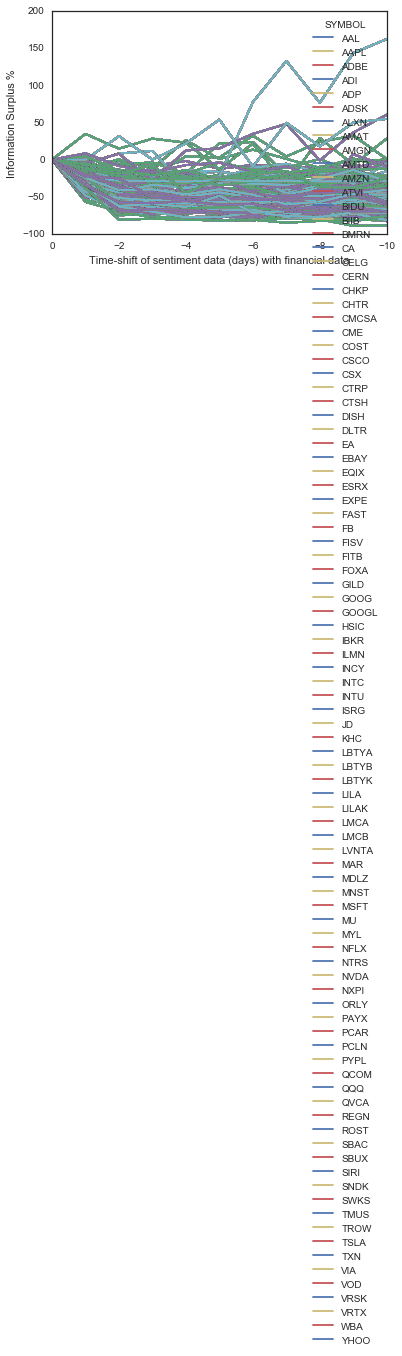

In [14]:
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_mi_res)

In [ ]:
# def shift (validate)
data_nasdaq_top_100_preprocessed_mi_res_validate = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, False)

In [ ]:
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_mi_res_validate)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net.head()

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'RTISf', 'VOLUME', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'VOLATILITY', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

## Data Analytics (with window)

### MI (Mutual Information)

In [ ]:
# def shift
data_nasdaq_top_100_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained)

In [ ]:
# def shift
data_nasdaq_top_100_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained)